In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
co2_year = pd.read_excel("co2_year.xlsx")
co2021 = pd.read_excel("co2_sector2021.xlsx")
co2transporte = pd.read_excel("transportation.xlsx")

unidad -> Million Metric tons (MMt) - Millones de toneladas

In [3]:
co2_year = co2_year.iloc[:51, [0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]]

In [4]:
co2021 = co2021.iloc[:51, [0,1,2,3,4,5]]

In [5]:
co2transporte = co2transporte.iloc[:51, [0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]]

In [6]:
from ydata_profiling import ProfileReport

In [7]:
reportco2 = ProfileReport(co2_year)

## **CO2 por año por estado**

En los ultimos 20 años, Estados unidos alcanzó un pico histórico en el 2007 a partir del cual implementó medidas para disminuirlo

<function matplotlib.pyplot.show(close=None, block=None)>

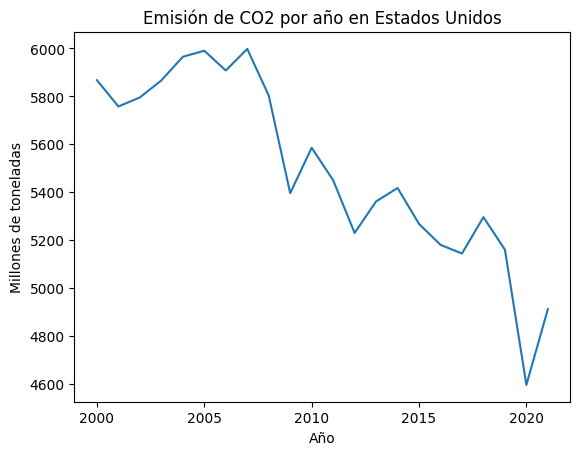

In [89]:
plt.figure()
sns.lineplot(data=co2_year.sum()[1:])
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 por año en Estados Unidos")
plt.show

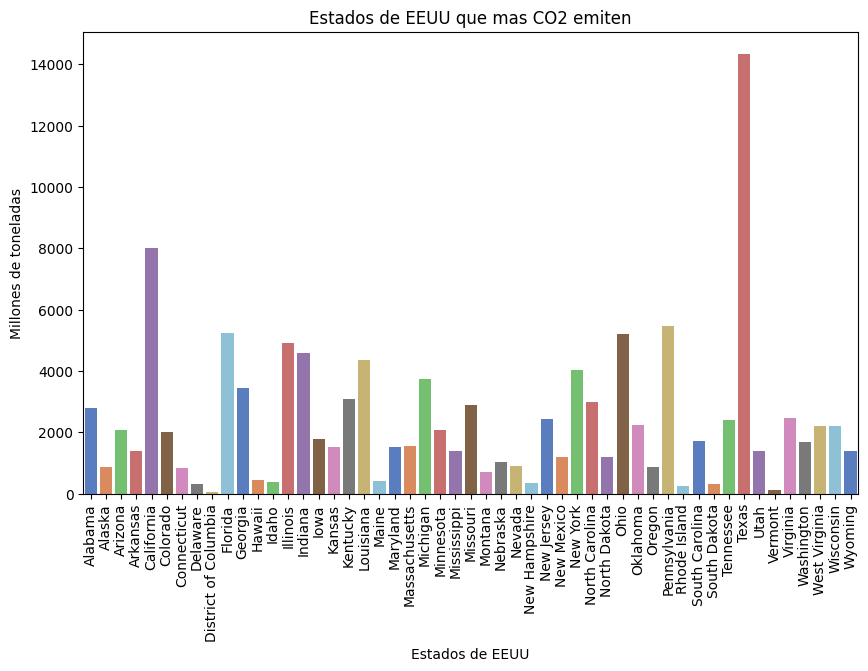

In [86]:
y = co2_year.T[1:].sum().values
x = co2_year["State"].values
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="muted")
plt.title("Estados de EEUU que mas CO2 emiten")
plt.xlabel("Estados de EEUU")
plt.xticks(rotation=90)
plt.ylabel("Millones de toneladas")
plt.show()

In [71]:
#Convertimos las columnas como categorias de una sola columna
lista = co2_year.columns.to_list()[2:]
co2año = co2_year[["State", 2000]].rename(columns={2000:"CO2"})
co2año["Year"] = 2000

for i in lista:
    df = co2_year[["State", i]].rename(columns={i:"CO2"})
    df["Year"] = i
    co2año = pd.concat([co2año, df])


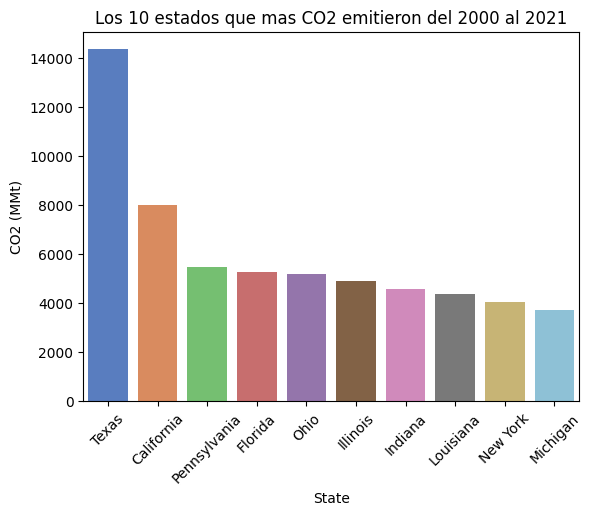

In [111]:
a = co2año[["State", "CO2"]].groupby("State").sum().sort_values(by="CO2",ascending=False).head(10)
plt.figure()
sns.barplot(data=a,x="State", y="CO2" ,palette="muted")
plt.title("Los 10 estados que mas CO2 emitieron del 2000 al 2021")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.show()

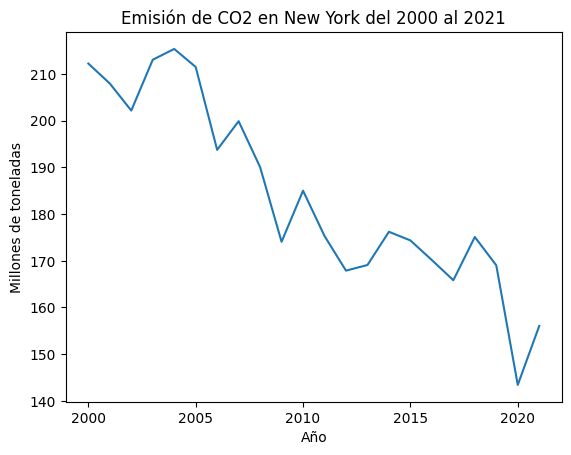

In [88]:
plt.figure()
sns.lineplot(data=co2año[(co2año["State"] == "New York")], y="CO2", x="Year")
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 en New York del 2000 al 2021")
plt.show()


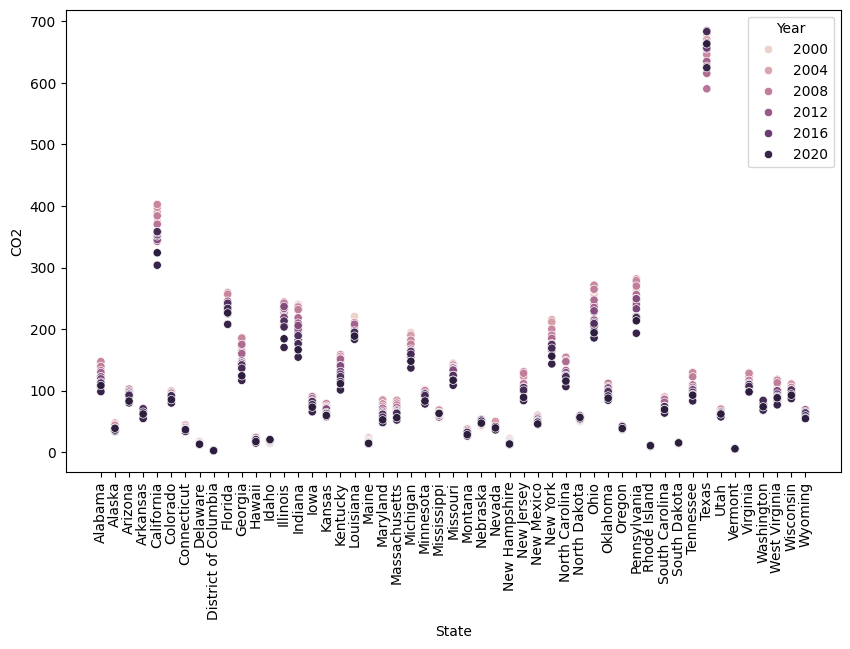

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=co2año, x="State", y="CO2", hue="Year")
plt.xticks(rotation=90)
plt.show()

## **Emision de CO2 por transporte**

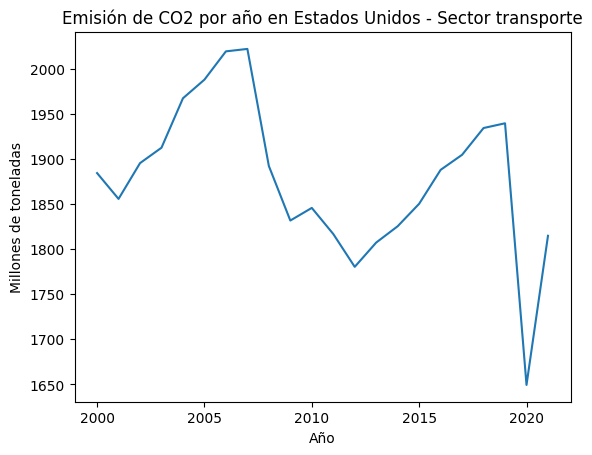

In [97]:
plt.figure()
sns.lineplot(data=co2transporte.sum()[1:])
plt.xlabel("Año")
plt.ylabel("Millones de toneladas")
plt.title("Emisión de CO2 por año en Estados Unidos - Sector transporte")
plt.show()

In [112]:
lista = co2transporte.columns.to_list()[2:]
co2año = co2transporte[["State", 2000]].rename(columns={2000:"CO2"})
co2año["Year"] = 2000

for i in lista:
    df = co2transporte[["State", i]].rename(columns={i:"CO2"})
    df["Year"] = i
    co2año = pd.concat([co2año, df])

New York es el cuarto estado de USA que produce más CO2 debido al transporte

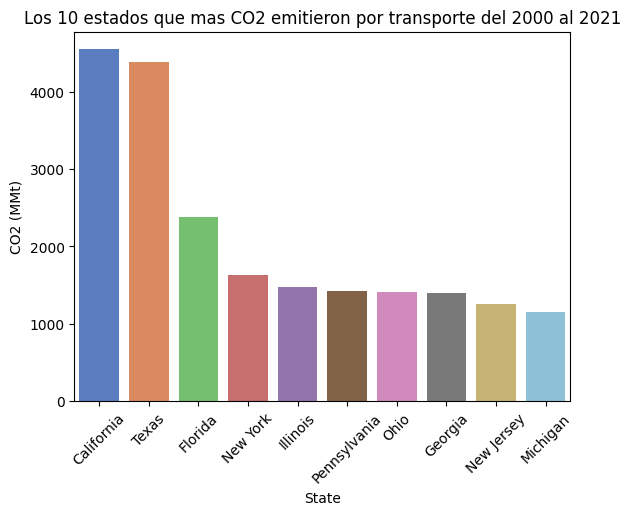

In [114]:
a = co2año[["State", "CO2"]].groupby("State").sum().sort_values(by="CO2",ascending=False).head(10)
plt.figure()
sns.barplot(data=a,x="State", y="CO2" ,palette="muted")
plt.title("Los 10 estados que mas CO2 emitieron por transporte del 2000 al 2021")
plt.xticks(rotation=45)
plt.ylabel("CO2 (MMt)")
plt.show()